# <img style="float: left; padding: 0px 10px 0px 0px;" src="https://upload.wikimedia.org/wikipedia/commons/1/1c/Logo_aiep.jpg"  width="80" /> Estadistica y Probabilidad para la Ciencia de Datos
**Instituto Profesional Aiep**<br>
**Semestre 2023-2**<br>
**Profesor:** Carlos Ramírez <br>
**Nombres:** Marjorie Gonzalez,

# Tarea 3: Separatrices y Regresión Multilineal.

***
## Instrucciones Generales.
- Esta Tarea debe ser desarrollada completamente en lenguaje de programación Python, y estructurarse en formato de Jupyter Notebook.
- Para cada pregunta, incluya un breve **análisis de los gráficos y/o resúmentes estadísticos generados**, de manera de responder a las preguntas planteadas.

***
## Introducción.
 Suponga que ud. está a cargo del desarrollo de un estudio del mercado laboral de científicos de datos en latinoamérica, para lo cual necesita construir, procesar y analizar una base de datos con las ofertas de trabajo publicadas en distintos países de la región.

El objetivo de esta Tarea, es realizar un análisis exploratorio de los datos, comprender las relaciones o tendencias entre distintas variables, y obtener conclusiones útiles que permitan esbozar un modelo predictivo de los salarios de cientistas de datos como función de su país, formación y experiencia profesional, y/o indicadores de la compañía.

## Datos de Entrada.

La base de datos final de ofertas de empleo para Cientistas de Datos en Sudamérica están disponibles en el siguiente link:

https://raw.githubusercontent.com/cjramirezt/linkdn-jobs/main/nombre_del_archivo.csv

Esta base de datos contiene las siguientes variables:

* `Country`: país del anuncio.
* `Location`: ubicación del empleo.
* `Title`: título del cargo ofrecido.
* `Company`: nombre de la compañía.
* `Url`: URL del anuncio.
* `CountryScore`: *Índice global de innovación* del país del anuncio.
* `English`: requisito de inglés para el empleo. 1: requiere idioma inglés, 0: no requiere idioma inglés.
* `EducationLevel`: años de formación profesional requeridos para el cargo. 0: no requiere formación profesional, 1: formación técnica básica, 2: dos años de formación técnica, 3: tres años de formación técnica,     4: bachiller, 5: título profesional, 6: postgrado.
* `YearsExperience`: años de experiencia laboral requeridos.
* `CompanyScore`: calificación de ambiente laboral de la compañía.




In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [ ]:
linkdn = pd.read_csv("https://raw.githubusercontent.com/cjramirezt/linkdn-jobs/main/nombre_del_archivo.csv", sep=';')
linkdn

,Country,Location,Title,Company,Url,CountryScore,English,EducationLevel,YearsExperience,CompanyScore,SalaryUSD
0,Chile,"Santiago, Santiago Metropolitan Region, Chile",Data Scientist,BICE VIDA,https://cl.linkedin.com/jobs/view/data-scienti...,34.0,1,3,6,6.683722,2621
1,Chile,"Santiago, Santiago Metropolitan Region, Chile",Data Scientist,BNamericas,https://cl.linkedin.com/jobs/view/data-scienti...,34.0,0,3,7,10.035329,2195
2,Chile,"Santiago, Santiago Metropolitan Region, Chile",Data Scientist.,Fuerza Laboral,https://cl.linkedin.com/jobs/view/data-scienti...,34.0,1,4,9,4.988700,3474
3,Chile,"Rancagua, O'Higgins Region, Chile",Data Scientist,Agrosuper,https://cl.linkedin.com/jobs/view/data-scienti...,34.0,0,3,7,1.766855,2195
4,Chile,"Santiago, Santiago Metropolitan Region, Chile",Data Scientist,MAS Analytics,https://cl.linkedin.com/jobs/view/data-scienti...,34.0,0,1,4,6.331954,1037
...,...,...,...,...,...,...,...,...,...,...,...
989,Guyana,"Mahaica, Demerara-Mahaica, Guyana",Lead Ruby on Rails Engineer,Aha!,https://gy.linkedin.com/jobs/view/lead-ruby-on...,NaN,1,1,4,5.924260,606
990,Guyana,Guyana,Sr. Security Engineer (Ruby on Rails experienc...,Aha!,https://gy.linkedin.com/jobs/view/sr-security-...,NaN,1,6,10,4.856359,1570
991,Guyana,Guyana,Sr. Ruby on Rails Engineer,Aha!,https://gy.linkedin.com/jobs/view/sr-ruby-on-r...,NaN,0,1,5,6.040759,449
992,Guyana,"Mahaica, Demerara-Mahaica, Guyana",Sr. Ruby on Rails Engineer,Aha!,https://gy.linkedin.com/jobs/view/sr-ruby-on-r...,NaN,0,2,7,4.944933,696


In [ ]:
linkdn.columns

Index(['Country', 'Location', 'Title', 'Company', 'Url', 'CountryScore',
       'English', 'EducationLevel', 'YearsExperience', 'CompanyScore',
       'SalaryUSD'],
      dtype='object')

### 1. ¿Cómo se distribuyen los datos de empleos por país?  

Genere un gráfico de barras o resumen estadístico que muestre claramente esta distribución. Además comente.
¿Están balanceados los datos, o puede identificar algún(os) países para los cuales los datos sean poco representativos?

Considerando los datos y la gráfica observada se puede ver claramente una desproporcionalidad en los datos, ya que Bolivia que es el país que más ofertas de empleo publica(120) casi triplica a Suriname el país que contiene menos ofertas publicadas (47).Argentina, Chile y Colombia también presentan una diferencia significativa en relación a los otros países con mayores anuncios publicados, aunque entre ellos la diferencia no es muy significativa

*Funciones útiles:* `sns.countplot()`,`pd.groupby()`,`pd.pivot_table()`.
La distribución de los datos segun empleos

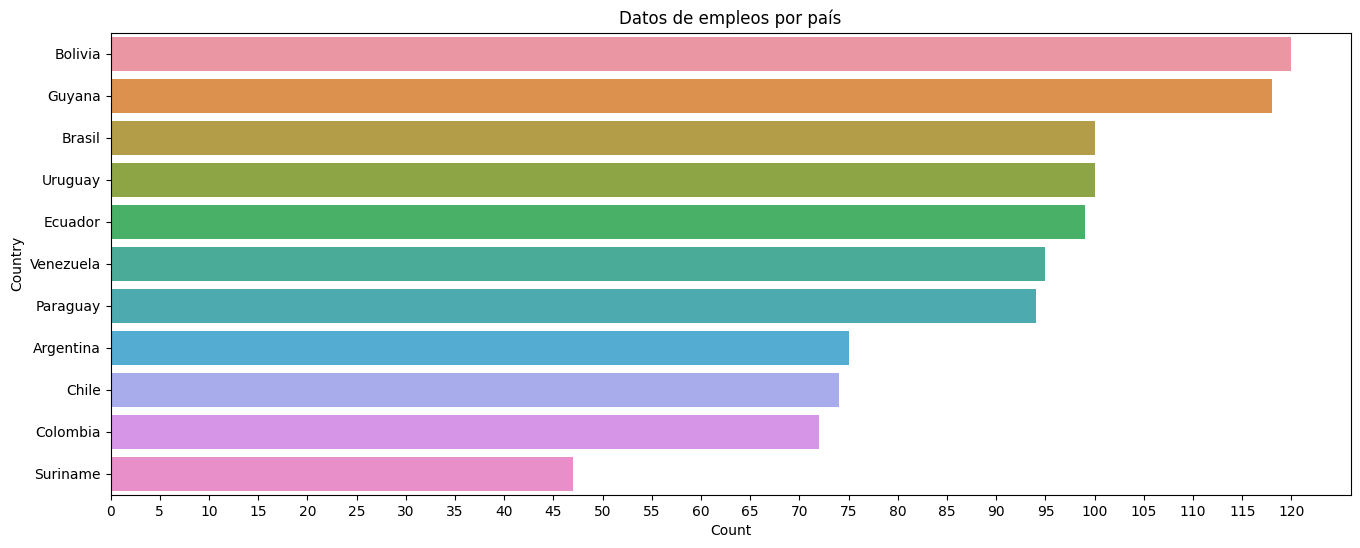

In [ ]:
trabajos_por_pais = linkdn['Country'].value_counts().reset_index()
trabajos_por_pais.columns = ['Country', 'Count']
plt.figure(figsize=(16, 6))
sns.barplot(x='Count', y='Country', data=trabajos_por_pais)
plt.title('Datos de empleos por país')
plt.xticks(range(0, max(trabajos_por_pais['Count'])+1, 5))
plt.show()

In [ ]:
linkdn ['Country'].value_counts()

Bolivia      120
Guyana       118
Brasil       100
Uruguay      100
Ecuador       99
Venezuela     95
Paraguay      94
Argentina     75
Chile         74
Colombia      72
Suriname      47
Name: Country, dtype: int64

### 2. Estudie la distribución de salarios en el dataset, y analice la existencia de datos anómalos.

**a)** Genere un histograma para la variable *SalaryUSD*, incluyendo una curva de densidad de probabilidad (kde).<br>


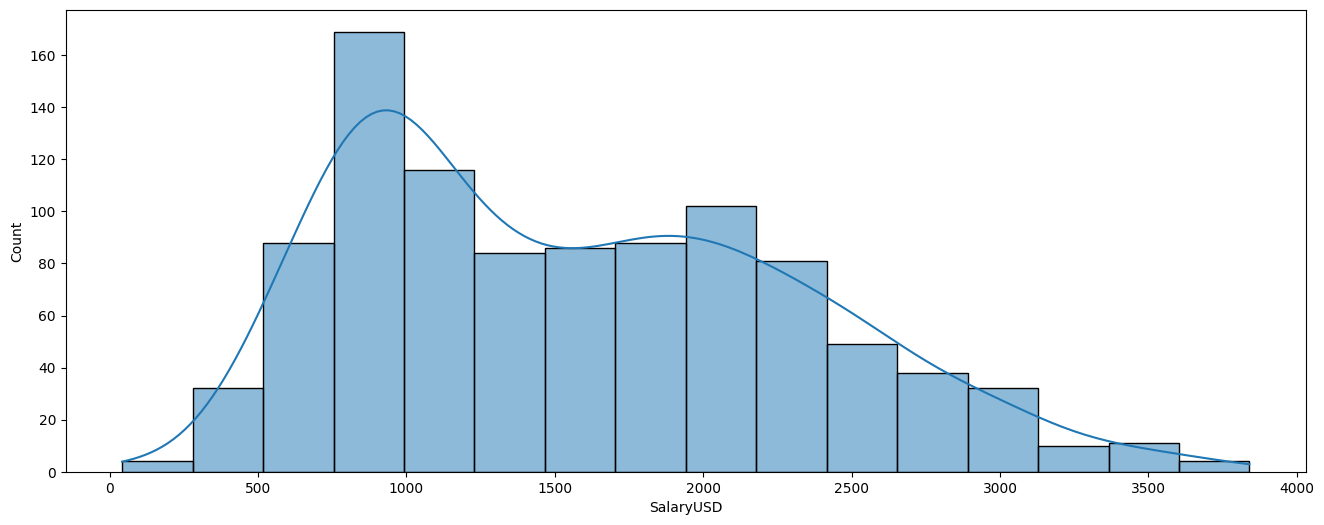

In [ ]:
plt.figure(figsize=(16, 6))
sns.histplot(data=linkdn, x='SalaryUSD', kde=True)
plt.show()

para calcular los cuartiles y otros estadigrafos de dispersion puede utilizar:

In [ ]:
Estadigrafos= linkdn['SalaryUSD'].describe()
Estadigrafos

count     994.000000
mean     1571.899396
std       753.686538
min        42.000000
25%       933.000000
50%      1468.000000
75%      2124.750000
max      3840.000000
Name: SalaryUSD, dtype: float64

para generar un boxplt puede usar como referencia:

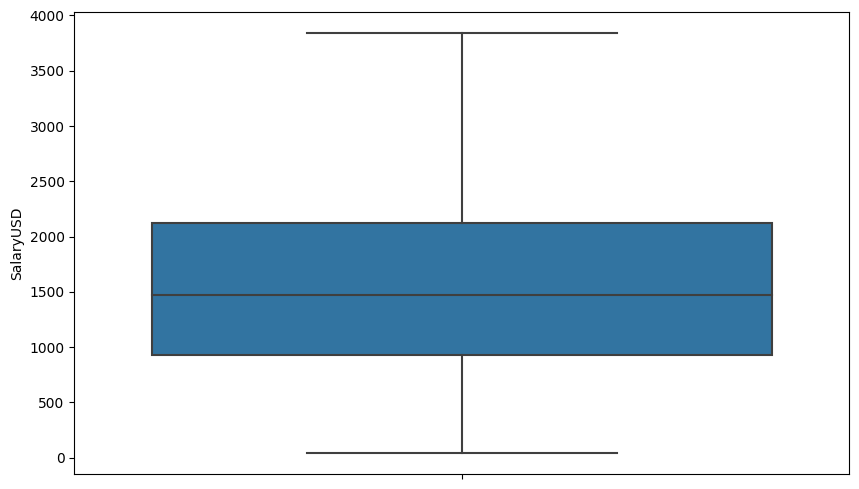

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=linkdn, y='SalaryUSD')
plt.show()

### 3. ¿Cómo se comparan en general los salarios promedio de Cientistas de Datos por país?

Genere un gráfico de cajas que muestre la media y dispersión de los salarios para cada país y analice.
¿Cuáles son los países con mayores y menores salarios medios? use boxplot y violinplot

La mayoría de los países tienen salarios sobre los 1500 dólares y en general presentan una gran dispersión en los salarios, siendo Chile (2465.635135 USD) el país que presenta un mejor promedio en los salarios y Venezuela (740.915789 USD)con el promedio de salario más bajo.

*Funciones útiles:* `sns.boxplot()`


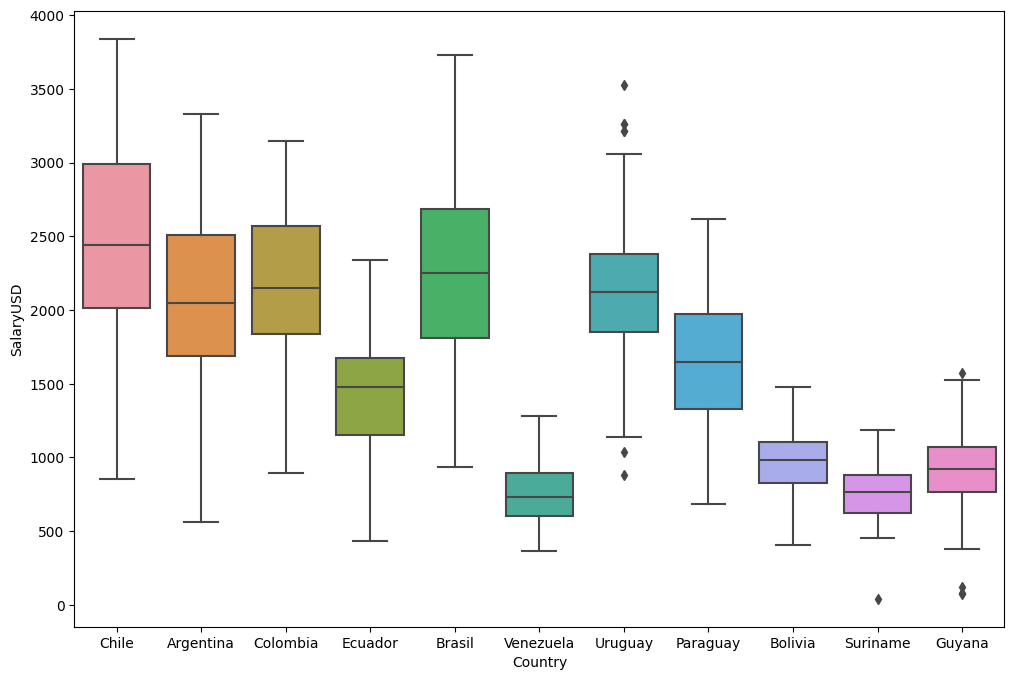

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=linkdn, x='Country', y='SalaryUSD')
plt.show()

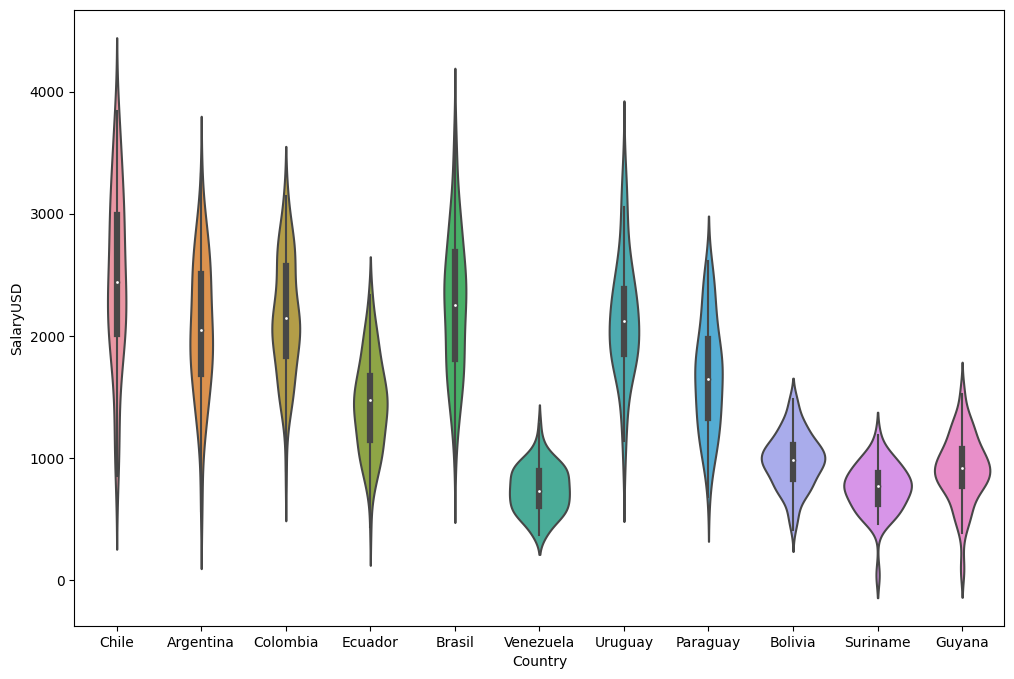

In [ ]:
plt.figure(figsize=(12, 8))
sns.violinplot(data=linkdn, x='Country', y='SalaryUSD')
plt.show()

### 4. ¿Influye el manejo del idioma inglés en los salarios? ¿Influye (o no) de la misma manera para todos los países?

Genere un **resumen estadístico y un gráfico** que le permitan responder fundadamente esta pregunta, y argumente su respuesta.

*Funciones útiles:* `sns.boxplot()`,`pd.groupby()`,`pd.pivot_table()`

Aquellos empleos donde no se requiere el manejo del inglés el salario promedio es de 1375, mientras que para los que sí requieren de dominio inglés el salario promedio es más alto, alrededor de 1754. Al comparar los salarios más altos entre aquellos empleos que requieren ingles de los que no podemos notar una diferencias de US 576.La dispersión de los salarios ( la desviación estándar), también es más alta en el grupo que maneja el inglés (US 797) en comparación con el grupo que no lo maneja (US 649).Por otra parte la distribución de salarios es más alta en el grupo que maneja el inglés. Considerando todas estas observaciones se puede concluir que el dominio de inglés si influye en el salario ofertado. Ahora bien si comparamos el dominio de inglés v/s salario a nivel de países en el gráfico de caja bigote podemos visualizar un aumento considerable de salario en aquellos empleos que requieren inglés versus los que no, podemos notar incluso que Chile es el país donde mayor diferencia se observa entre salario y oferta de empleo que requieren ingles ya que aquellos empleos que requieren inglés se alejan en salario de aquellos empleos donde no es necesario el dominio de inglés. En conclusión observamos en ambas gráficas que la variable 'English' incide significativamente en la obtención de salarios más altos.

In [ ]:
summary = linkdn.groupby('English')['SalaryUSD'].describe()
summary

,count,mean,std,min,25%,50%,75%,max
English,,,,,,,,
0,479.0,1375.311065,649.486432,42.0,808.0,1295.0,1866.0,3264.0
1,515.0,1754.745631,797.248839,81.0,1030.0,1710.0,2366.0,3840.0


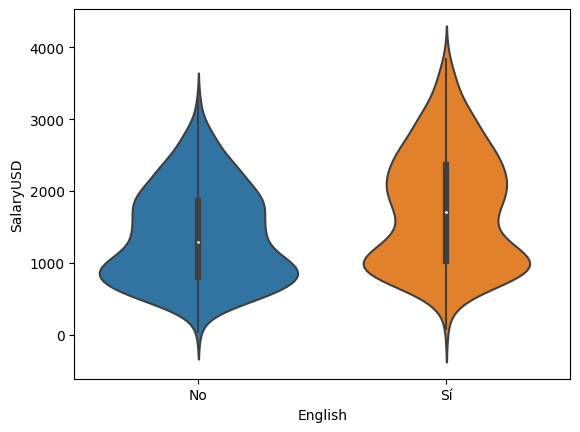

In [ ]:
sns.violinplot(data=linkdn, x='English', y='SalaryUSD')
plt.xticks([0, 1], ['No', 'Sí'])
plt.show()

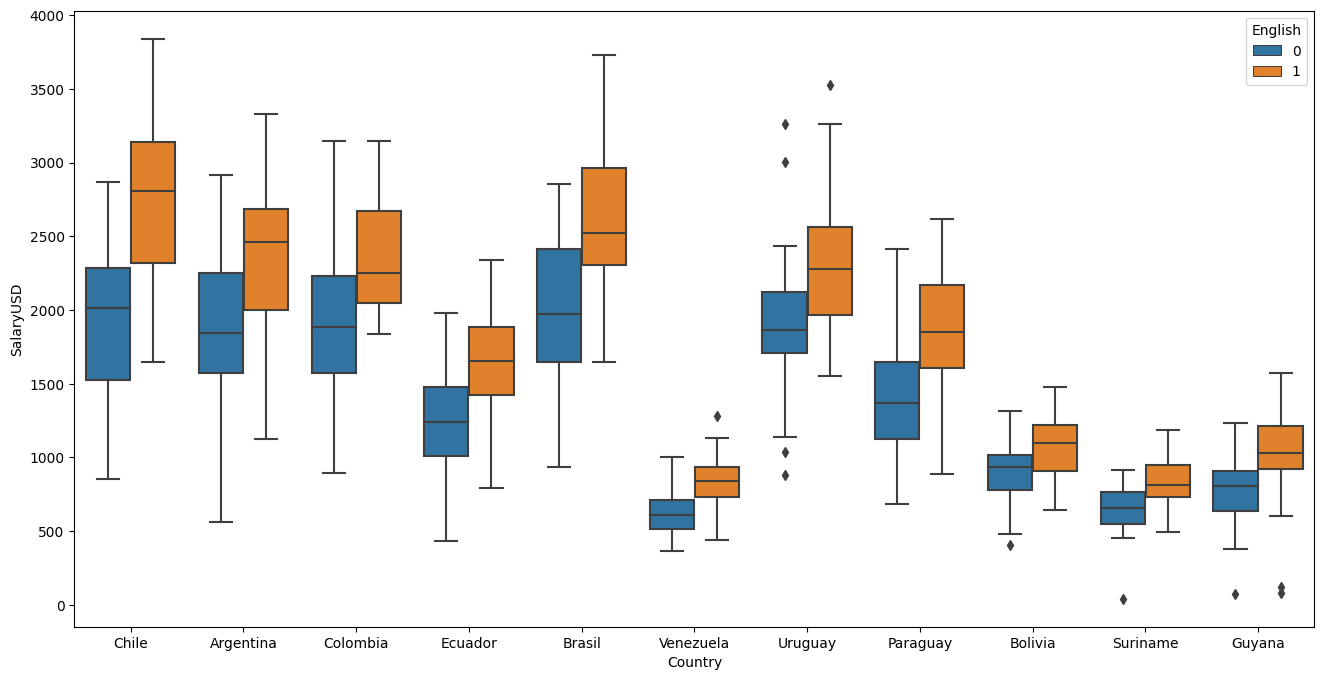

In [ ]:
plt.figure(figsize=(16, 8))
sns.boxplot(data=linkdn, x="Country", y="SalaryUSD", hue="English" )
plt.show()

### 5. Analice los  años de experiencia y nivel educacional requeridos en los distintos países de sudamérica. ¿Son similares, o puede detectar alguna diferencia significativa para alguno(s)?

Genere una **tabla resumen y gráficos** con los promedios de las variables *EducationLevel* y *YearsExperience* por país, y en base a ellos argumente su respuesta.

Al observar las tablas y los gráficos es notorio que los países se comportan de manera similar en el nivel de educación y en los años de experiencia. En cuanto al nivel de educación la media de todos los países está cercana a 3 y poseen una desviación cercana a 1 lo que significa que la variabilidad de los datos es relativamente baja. En el caso de los años de experiencia los datos se centran en los 7 años de experiencia y con una desviación alrededor de 1.5 que sigue siendo una variabilidad más alta.

*Funciones útiles:* `sns.boxplot()`,`pd.groupby()`,`pd.pivot_table()`:




In [ ]:
 linkdn.groupby('Country')[['EducationLevel', 'YearsExperience']].describe()

EducationLevel                                               \
                   count      mean       std  min  25%  50%  75%  max   
Country                                                                 
Argentina           75.0  3.013333  1.179708  0.0  2.0  3.0  4.0  6.0   
Bolivia            120.0  2.983333  0.987173  1.0  2.0  3.0  4.0  5.0   
Brasil             100.0  3.070000  1.046929  1.0  2.0  3.0  4.0  5.0   
Chile               74.0  2.756757  1.144502  1.0  2.0  3.0  4.0  5.0   
Colombia            72.0  3.041667  0.984922  1.0  2.0  3.0  4.0  6.0   
Ecuador             99.0  2.848485  1.172505  0.0  2.0  3.0  4.0  5.0   
Guyana             118.0  2.974576  1.120606  1.0  2.0  3.0  4.0  6.0   
Paraguay            94.0  3.117021  1.144001  0.0  2.0  3.0  4.0  6.0   
Suriname            47.0  3.042553  0.907875  1.0  3.0  3.0  4.0  5.0   
Uruguay            100.0  2.950000  1.018763  1.0  2.0  3.0  4.0  6.0   
Venezuela           95.0  2.873684  1.132143  1.0  2.0  3.0  3.0  6.0   

          YearsExperience                                                
                    count      mean       std  min  25%  50%  75%   max  
Country                                                                  
Argentina            75.0  7.040000  1.711961  2.0  6.0  7.0  8.0  11.0  
Bolivia             120.0  6.908333  1.426024  4.0  6.0  7.0  8.0  10.0  
Brasil              100.0  7.130000  1.382831  4.0  6.0  7.0  8.0  11.0  
Chile                74.0  6.770270  1.566318  3.0  6.0  7.0  8.0  11.0  
Colombia             72.0  7.097222  1.445339  4.0  6.0  7.0  8.0  10.0  
Ecuador              99.0  6.878788  1.364811  4.0  6.0  7.0  8.0  10.0  
Guyana              118.0  7.186441  1.437883  4.0  6.0  7.0  8.0  11.0  
Paraguay             94.0  6.936170  1.564447  3.0  6.0  7.0  8.0  11.0  
Suriname             47.0  6.936170  1.579822  4.0  6.0  7.0  8.0  10.0  
Uruguay             100.0  6.900000  1.480513  4.0  6.0  7.0  8.0  11.0  
Venezuela            95.0  6.926316  1.393313  3.0  6.0  7.0  8.0  10.0

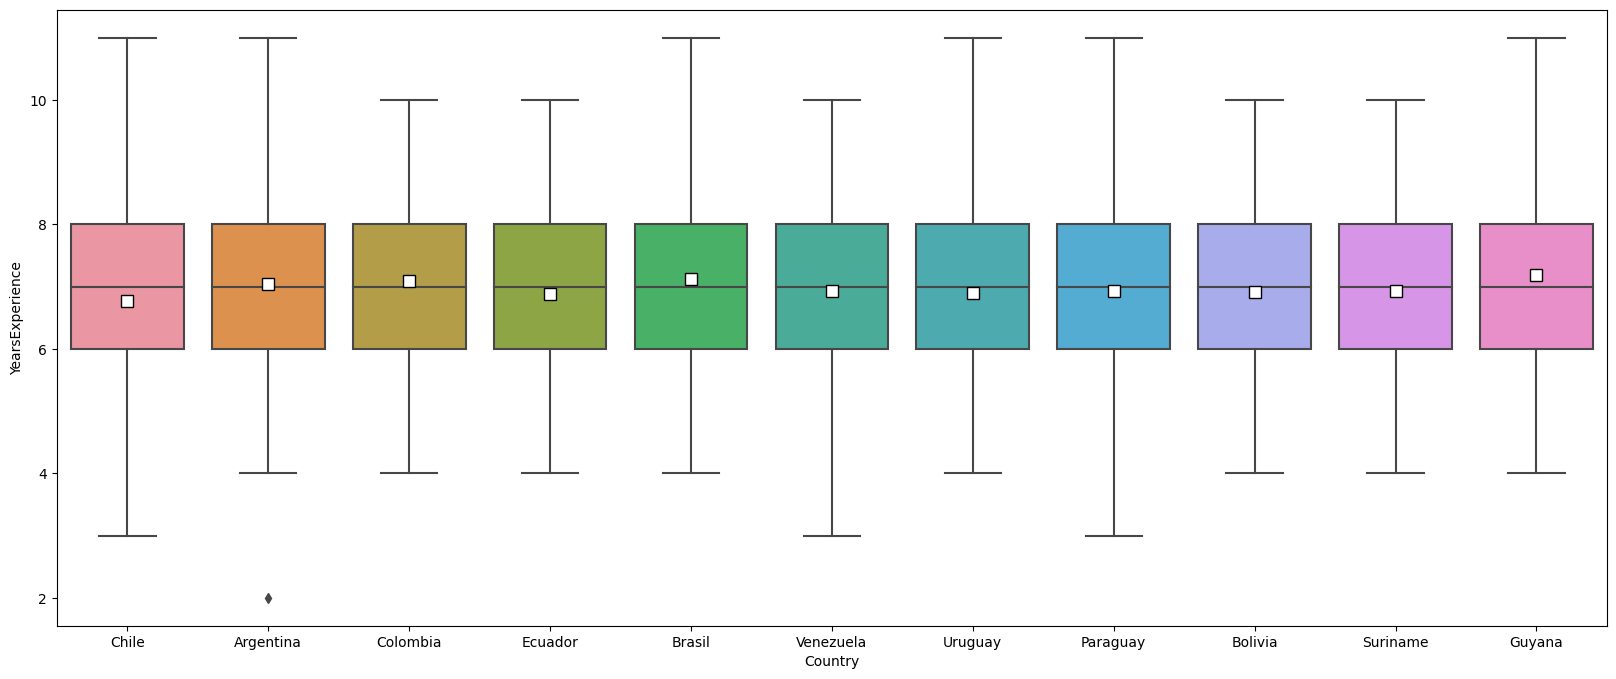

In [ ]:
plt.figure(figsize=[20,8])
sns.boxplot(x='Country', y='YearsExperience', data=linkdn,showmeans=True, meanprops={"marker":"s",
                       "markerfacecolor":"white",
                       "markeredgecolor":"black",
                      "markersize":"9"})
plt.show()

### 6. Calcule y grafique la matriz de correlación para las variables numéricas del dataset.

Analice los coeficientes de correlación entre *SalaryUSD* y otras variables del dataset.

¿Cuáles variables identifica como más correlacionadas, o más relevantes para construir un modelo predictivo de salarios?

Observando la matriz de correlación se puede identificar que la variable CountryScore (Índice global de innovación del país del anuncio) presenta más correlación con el SalaryUSD con un resultado de 0.55 , sin embargo examinar conjuntamente las variables Country,SalaryUSD Y CountryScore, observamos que algunos países en nuestra muestra no cuentan con CountryScore como es el caso de Bolivia,Guyana,Brasil, Venezuela y suriname. La suma de los anuncios publicados en estos países es 480 (120 + 118 + 100 + 95 + 47), en comparación con el total de la muestra de 994 , es decir estamos hablando de casi el 48% de la muestra no presenta valores para la variable correlacionada, A pesar de esta falta de datos, el porcentaje se asemeja al resultado de la correlación, que es 0.55.En síntesis podemos decir entonces que la variable "CountryScore" parece tener una correlación más fuerte, esta correlación es arriesgada debido a la falta de datos para una parte significativa de la muestra, lo que nos deja con un escenario de 50/50 en la efectividad del modelo. Otras variables que se pueden agregar al modelo y tiene una correlación más alta son 'EducationLevel' con un 0.44 y 'YearsExperience' con un 0.43. Otra observación importante es considerar como en la pregunta 3 el 'English' ,ya que si bien al correlacionarse con la variable Salary USD no presenta un valor representativo (0.25), parece ser una variable incidente en CountryScore que como se mencionó anteriormente es la que mayor correlación presenta en cuanto a SalaryUSD.


*Funciones útiles:* `sns.heatmap()` ,`pd.corr()`


In [ ]:
linkdn ['Country'].value_counts()

Bolivia      120
Guyana       118
Brasil       100
Uruguay      100
Ecuador       99
Venezuela     95
Paraguay      94
Argentina     75
Chile         74
Colombia      72
Suriname      47
Name: Country, dtype: int64

In [ ]:
Anuncios_sinCountryScore = 120+118+100+95+47
Anuncios_sinCountryScore

480

In [ ]:
Total_anuncios= Anuncios_sinCountryScore + 100+99+94+75+74+72
Total_anuncios

994

In [ ]:
porcentaje_sinCountryScore = (Anuncios_sinCountryScore*100)/Total_anuncios
porcentaje_sinCountryScore

48.2897384305835

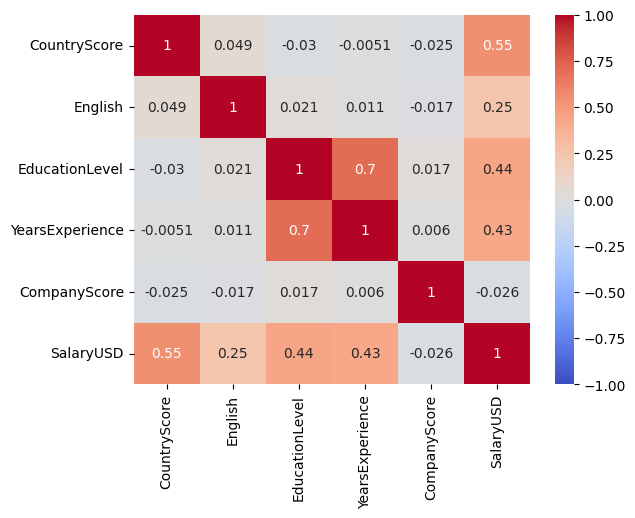

In [ ]:
correlation_matrix = linkdn[['CountryScore','English','EducationLevel','YearsExperience','CompanyScore','SalaryUSD']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()
salary_correlation = correlation_matrix['SalaryUSD'].sort_values(ascending=False)

In [ ]:
linkdn.groupby('Country')[['CountryScore','SalaryUSD']].describe()

CountryScore                                                    \
                 count  mean           std   min   25%   50%   75%   max   
Country                                                                    
Argentina         75.0  28.6  7.153276e-15  28.6  28.6  28.6  28.6  28.6   
Bolivia            0.0   NaN           NaN   NaN   NaN   NaN   NaN   NaN   
Brasil             0.0   NaN           NaN   NaN   NaN   NaN   NaN   NaN   
Chile             74.0  34.0  0.000000e+00  34.0  34.0  34.0  34.0  34.0   
Colombia          72.0  29.2  3.577645e-15  29.2  29.2  29.2  29.2  29.2   
Ecuador           99.0  20.3  3.570794e-15  20.3  20.3  20.3  20.3  20.3   
Guyana             0.0   NaN           NaN   NaN   NaN   NaN   NaN   NaN   
Paraguay          94.0  22.6  1.071529e-14  22.6  22.6  22.6  22.6  22.6   
Suriname           0.0   NaN           NaN   NaN   NaN   NaN   NaN   NaN   
Uruguay          100.0  29.2  1.428245e-14  29.2  29.2  29.2  29.2  29.2   
Venezuela          0.0   NaN           NaN   NaN   NaN   NaN   NaN   NaN   

          SalaryUSD                                                            \
              count         mean         std    min      25%     50%      75%   
Country                                                                         
Argentina      75.0  2064.706667  557.087910  564.0  1690.00  2048.0  2509.00   
Bolivia       120.0   979.175000  224.633807  407.0   824.25   980.0  1105.00   
Brasil        100.0  2251.630000  579.178182  933.0  1811.00  2249.0  2688.00   
Chile          74.0  2465.635135  710.423828  854.0  2012.00  2438.5  2987.00   
Colombia       72.0  2153.861111  477.555522  892.0  1835.00  2149.0  2569.00   
Ecuador        99.0  1439.787879  389.148318  432.0  1151.00  1475.0  1672.00   
Guyana        118.0   906.983051  278.303990   74.0   768.50   920.0  1071.25   
Paraguay       94.0  1673.978723  454.022499  684.0  1328.00  1650.0  1971.00   
Suriname       47.0   751.829787  200.688198   42.0   622.00   768.0   878.00   
Uruguay       100.0  2147.760000  503.502242  881.0  1852.25  2124.0  2383.00   
Venezuela      95.0   740.915789  193.255737  366.0   604.00   732.0   896.00   

                   
              max  
Country            
Argentina  3328.0  
Bolivia    1481.0  
Brasil     3730.0  
Chile      3840.0  
Colombia   3145.0  
Ecuador    2337.0  
Guyana     1570.0  
Paraguay   2615.0  
Suriname   1189.0  
Uruguay    3523.0  
Venezuela  1280.0

### 7. Construya gráficos de dispersión entre salarios y las demás variables.

**a)** Genere un conjunto de gráficos de dispersión entre `SalaryUSD` y las demás variables, diferenciando por país.(Hint: Revise cuidadosamente la documentación y parámetros de la función `sns.pairplot()`). <br>
**b)** Analice los gráficos y comente,
* ¿qué correlaciones puede identificar?
* ¿varían estas correlaciones por país?
* ¿son coherentes las conclusiones obtenidas a partir de los gráficos, con la matriz de correlación calculada en el punto 5?

En general los datos están muy dispersos y en su gran mayoría se puede inferir que tienen una correlación cercana al cero lo que se puede identificar en el gráfico de la pregunta 6 y 8. Centrándose en el salario las variables con las que tiene una mayor correlación son el nivel de educación y los años de experiencia las que tendrían una correlación cercana al 1 ya que mientras más años de experiencia y mayor nivel de educación el salario llega a ser mucho más alto. Otras variables que tendrían una tendencia a una correlación positiva es CountryScore e Inglés que son datos muy dispersos pero que al aumentar los valores suelen tener mayores sueldos pero no estarían directamente relacionados.


*Funciones útiles:* `sns.pairplt()`


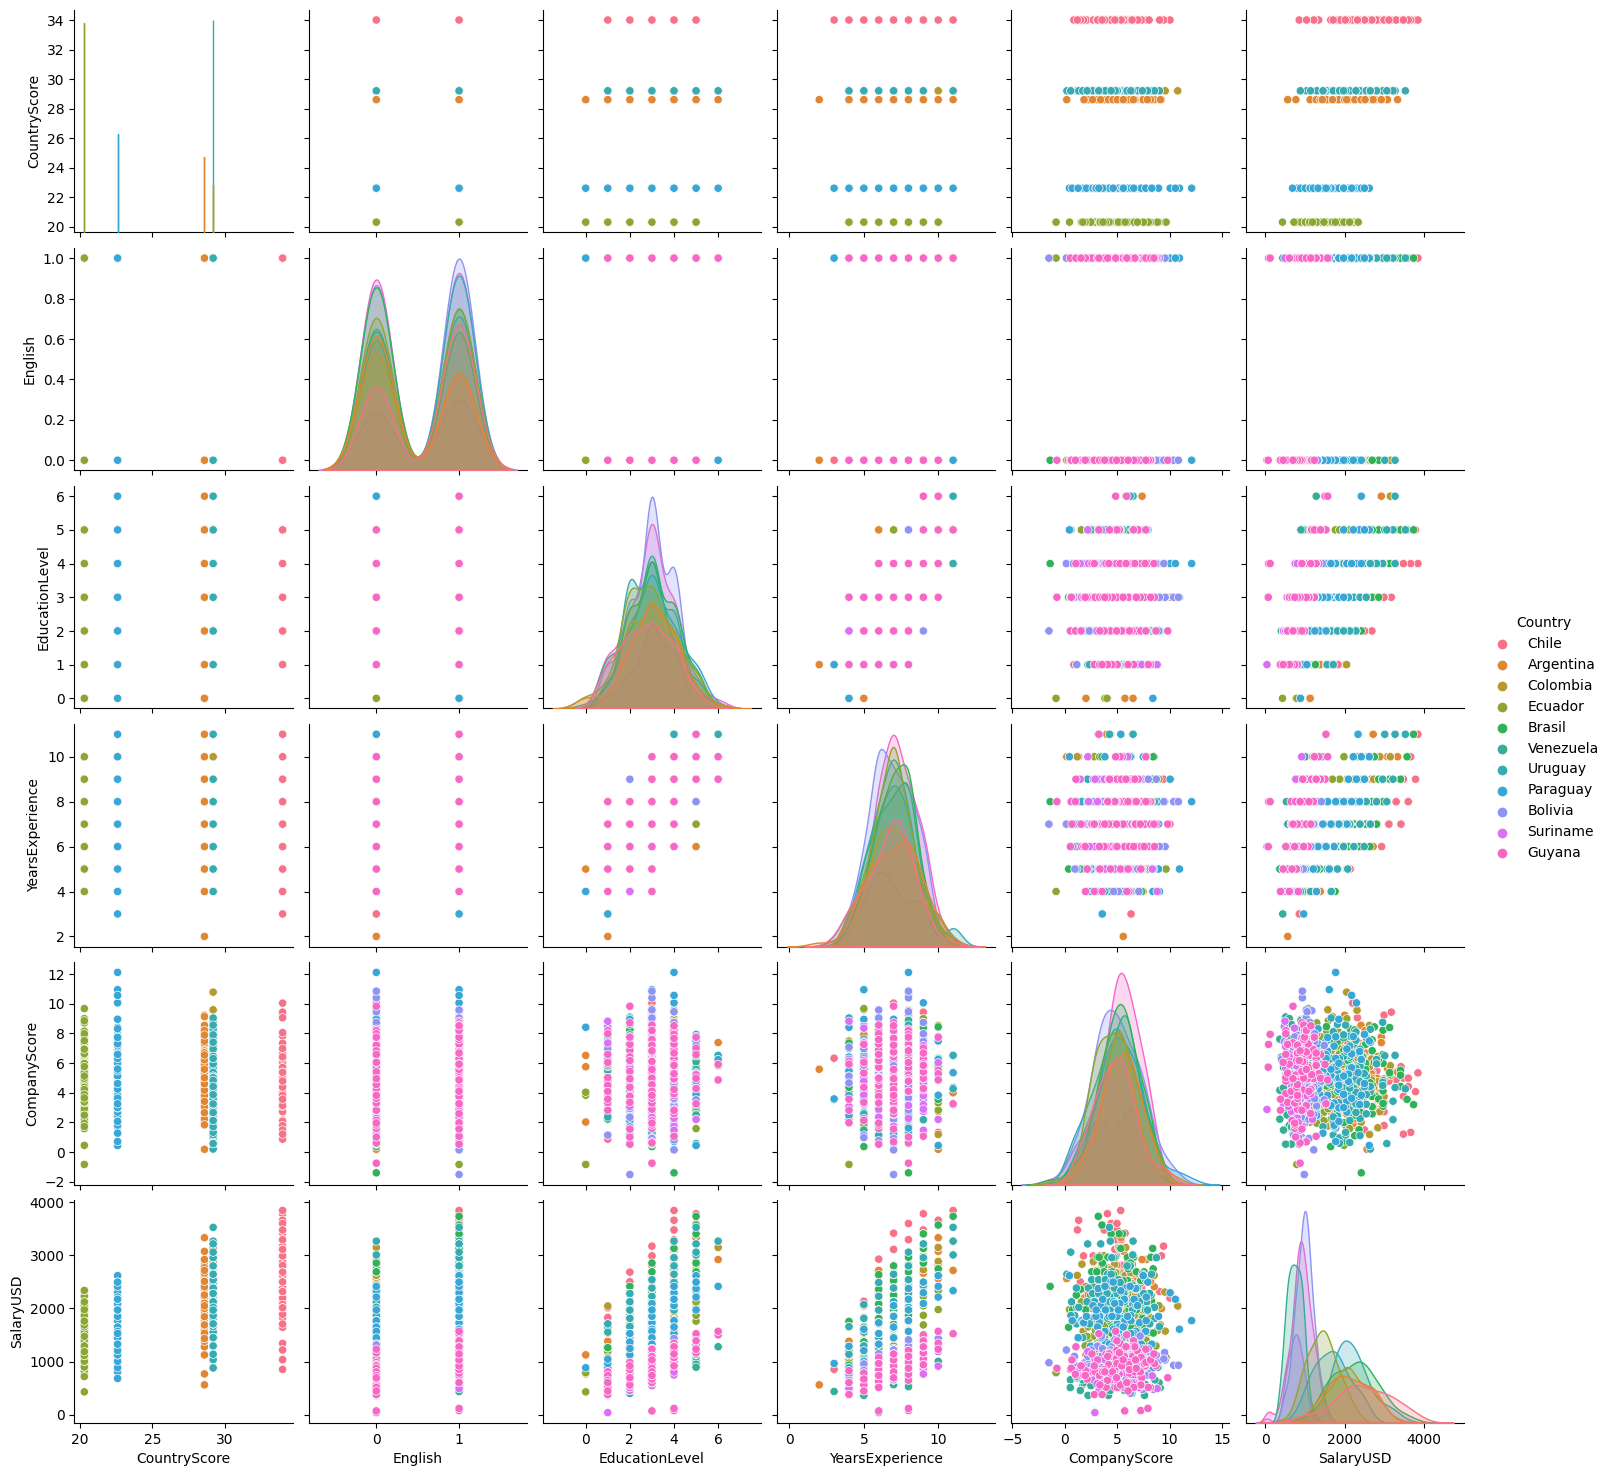

In [ ]:
variables_de_interes = ['CountryScore','English','EducationLevel','YearsExperience','CompanyScore','SalaryUSD', 'Country']
data_subset = linkdn[variables_de_interes]
sns.pairplot(data_subset,x_vars=['CountryScore','English','EducationLevel','YearsExperience','CompanyScore','SalaryUSD'] ,hue='Country')
plt.show()

### 8. Analice la correlación entre variables para un país en particular.

**a)** Seleccione los registros del Dataframe correspondientes a un país a su elección, y calcule nuevamente la matriz de correlación para este subconjunto de los datos. <br>

**b)** ¿Cómo varían sus resultados respecto a la matriz de correlación calculada con todos los datos en el punto 5? ¿Qué conclusión puede obtener a partir de esta comparación, que sea de utilidad para la construcción de un modelo predictivo de salarios?

En el punto 5 comparamos las variables 'EducationLevel' y 'YearsExperience' observamos que la media de experiencia laboral para la media 2.9 en nivel educacional requiere de 6 años de experiencia, mientras que la media de 3 en nivel educacional requiere de 7 años de experiencia. Al revisar los resultados de la matriz de relación del país elegido "Uruguay" se visualiza la correlación entre las variables antes mencionadas y el salario, además se refleja una incidencia de la variable English. Por lo tanto y argumentando también en base a la pregunta número 6 donde creamos la matriz de correlación en base al 'SalaryUSD' y cuya correlación más alta estaba en la variable 'CountryScore', las variables más correlacionadas y que nos permitirían crear un modelo de salarios más asertivo son :'EducationLevel', 'YearsExperience', 'English','CountryScore'.



*Funciones útiles:* `sns.heatmap()` ,`pd.corr()`


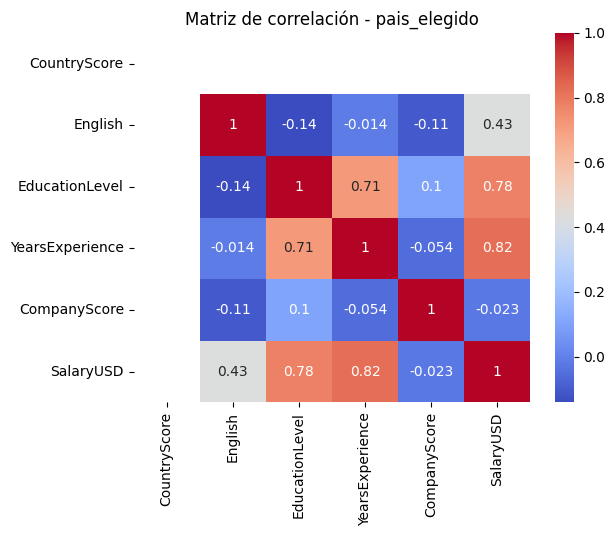

In [ ]:
pais_elegido_data = linkdn[linkdn['Country'] == 'Uruguay'][variables_de_interes]
pais_elegido_corr = pais_elegido_data.corr()
sns.heatmap(pais_elegido_corr, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación - pais_elegido')
plt.show()

### 9. Genere un modelo de regresión multilineal para todo el conjunto de datos.

**a)** Indique claramente las variables predictoras a incluir en su modelo de regresión, justificando su elección.
**b)** Implemente la regresión lineal utilizando la librería `statsmodel`.<br>
**c)** Imprima y analice el resumen de los resultados de la regresión, comente: ¿qué tan bueno o malo es el ajuste multilineal? ¿cuál es la importancia relativa de las distintas variables predictoras?<br>
**d)** Repita los puntos **b)** y **c)**, ahora con el subconjunto de datos del país elegido en el punto 7.¿Cómo cambian sus resultados respecto a la regresión obtenida en **b)**?<br>

Los resultados del ajuste multilineal son bastante buenos, en el caso de la base de datos general el R-squared: 0.978 lo que indica que llegaría a ser una predicción bastante asertiva en cuanto al sueldo posible. En este caso hay cuatro variables que toman un valor significativo para que la predicción pueda ser asertiva, las variables serían EducationLevel, YearsExperience, 'English','CountryScore', siendo esta última la más relevante, ya que si esta variable se elimina la asertividad baja a un 0.280 y siendo la menos relevantes en este caso YearsExperience, ya que al eliminarla la asertividad baja a un 0.911 lo que sigue siendo considerablemente bueno.

Al poder analizar los datos del país (Uruguay), los resultados del ajuste multilineal son excelentes, ya que tienen un R-squared:1 lo que implica que tendría una predicción perfecta, en este caso específico las variables a considerar para poder realizar esta predicción sería 'EducationLevel', 'YearsExperience', 'English' en las cuales por sí solas la más influyente es 'YearsExperience' que tendría una predicción de 0.678 y la más baja 'English' con 0.182 , sin embargo, es una de las variables más importantes, ya que al eliminarla la precisión baja a un 0.753 y al sacar cualquiera de las otras variables la predicción solo baja alrededor de 0.85 ( esto se puede reflejar si los codigos se modifican). Es importante destacar que al sumar los coeficientes según los datos, se logra una predicción exacta como se puede observar en el ejemplo de abajo.


*Funciones útiles:* `stasmodel` ,`sm.OLS(y,X)`,`model.fit()`,`results.summary()`

In [ ]:
data_cleaned = linkdn.dropna(subset=['EducationLevel', 'YearsExperience', 'English','CountryScore' ,'SalaryUSD','CompanyScore'])
X = data_cleaned[['EducationLevel', 'YearsExperience', 'English','CountryScore']]
y = data_cleaned['SalaryUSD']
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalaryUSD   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     5560.
Date:                Sun, 26 Nov 2023   Prob (F-statistic):               0.00
Time:                        01:44:34   Log-Likelihood:                -3055.0
No. Observations:                 514   AIC:                             6120.
Df Residuals:                     509   BIC:                             6141.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1993.5830     30.944    -

In [ ]:
X = pais_elegido_data[['EducationLevel', 'YearsExperience']]
y = pais_elegido_data['SalaryUSD']
X = sm.add_constant(X)
model = sm.OLS(y, X)
results_pais_elegido = model.fit()
print(results_pais_elegido.summary())

                            OLS Regression Results                            
Dep. Variable:              SalaryUSD   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     147.5
Date:                Sun, 26 Nov 2023   Prob (F-statistic):           3.83e-30
Time:                        01:44:34   Log-Likelihood:                -693.72
No. Observations:                 100   AIC:                             1393.
Df Residuals:                      97   BIC:                             1401.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             298.9040    122.182     

In [ ]:
Uruguay =pais_elegido_data[pais_elegido_data["Country"] == "Uruguay"]
Uruguay.head()

,CountryScore,English,EducationLevel,YearsExperience,CompanyScore,SalaryUSD,Country
515,29.2,0,2,5,5.893376,1296,Uruguay
516,29.2,1,2,6,3.949988,1969,Uruguay
517,29.2,1,1,6,1.140096,1710,Uruguay
518,29.2,1,3,7,2.253906,2383,Uruguay
519,29.2,1,2,5,2.671204,1814,Uruguay


In [ ]:
def SalaryUSD (EducationLevel, YearsExperience, English):
  Salario=((0.8553)+(258.8695*EducationLevel)+(155.4372*YearsExperience)+(517.8718*English))
  print(Salario)

In [ ]:
SalaryUSD(2,5,0)

1295.7803
